### A7      :   Project Report
### Name    :   Sindhu Madhadi
### Project :   " Analyisis of Vaccines on Covid 19 Data for Illinois, DupageCounty"


In [1]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (FuncFormatter)
from mpl_toolkits.mplot3d import Axes3D



#### This is Final Merged data of the Illinois, Dupgae county with Mask Mandate data from A4 Analysis:

In [2]:
df_illinois_data= pd.read_csv('/Users/dinsind/Documents/SindhuWork/Data_512/A4_common_Analysis/Final/number_of_daily_cases.csv',low_memory=False)
df_illinois_data['Date'] = pd.to_datetime(df_illinois_data['Date'])


df_illinois_data.head()



,Unnamed: 0,Date,ConfirmedCases,DailyCases
0,34068,2020-02-01,0,0.0
1,37410,2020-02-02,0,0.0
2,40752,2020-02-03,0,0.0
3,44094,2020-02-04,0,0.0
4,47436,2020-02-05,0,0.0


### Analysis on Effect of vaccines:
### Get the data:


In [3]:
df_Vaccines_data=pd.read_csv('/Users/dinsind/Downloads/COVID-19_Vaccinations_in_the_United_States_County.csv')
df_Vaccines_data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/09/2021,13023,45,Bleckley County,GA,12.3,1582,1582.0,14.1,1416,...,C,9.0,9.0,9.0,9.0,Non-metro,5.0,5.0,5.0,5.0
1,11/09/2021,29125,45,Maries County,MO,35.1,3054,3054.0,40.2,2920,...,C,10.0,11.0,11.0,11.0,Non-metro,6.0,7.0,7.0,7.0
2,11/09/2021,39151,45,Stark County,OH,49.2,182211,182209.0,57.0,172738,...,B,7.0,8.0,8.0,8.0,Metro,3.0,4.0,4.0,4.0
3,11/09/2021,42113,45,Sullivan County,PA,46.6,2825,2825.0,49.8,2759,...,B,7.0,7.0,8.0,8.0,Non-metro,7.0,7.0,8.0,8.0
4,11/09/2021,33005,45,Cheshire County,NH,57.2,43524,43516.0,64.6,41103,...,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0


In [4]:
# Filter the County
df_Vaccines_data=df_Vaccines_data[(df_Vaccines_data['Recip_County']=='DuPage County')&(df_Vaccines_data['Recip_State']=='IL')]


In [5]:


#Foramt the Date:
df_Vaccines_data['Date'] = pd.to_datetime(df_Vaccines_data['Date'], format='%m/%d/%Y')
df_Vaccines_data.head()

#Filter for the time period:
df_Vaccines_data = df_Vaccines_data[(df_Vaccines_data['Date'] >= '2020-02-01') & (df_Vaccines_data['Date'] <= '2021-10-15')]
df_Vaccines_data.head(10)

df_Vaccines_data.to_csv('/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/Dupgae_Vaccines_data.csv')
df_Vaccines_data.head()


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
84828,2021-10-15,17043,41,DuPage County,IL,62.0,572535,570880.0,72.3,525643,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
87657,2021-10-14,17043,41,DuPage County,IL,62.0,572526,570871.0,72.3,525634,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
91138,2021-10-13,17043,41,DuPage County,IL,62.0,572519,570864.0,72.3,525627,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
92311,2021-10-12,17043,41,DuPage County,IL,62.0,572514,570859.0,72.3,525622,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
95836,2021-10-11,17043,41,DuPage County,IL,62.0,572183,570528.0,72.3,525343,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0


In [6]:
# Combine the two data sets on Date:


#df_Vaccines_Dupage_merged_data = df_illinois_data.join(df_Vaccines_data.set_index('Date'), on='Date', how ='left',lsuffix='_left', rsuffix='_right')
df_Vaccines_Dupage_merged_data= df_illinois_data.merge(df_Vaccines_data, on='Date', how='left').fillna(0)
df_Vaccines_Dupage_merged_data.head()



,Unnamed: 0,Date,ConfirmedCases,DailyCases,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,34068,2020-02-01,0,0.0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,37410,2020-02-02,0,0.0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,40752,2020-02-03,0,0.0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,44094,2020-02-04,0,0.0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,47436,2020-02-05,0,0.0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [7]:
df_Vaccines_Dupage_merged_data.to_csv('/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/Dupgae_Vaccines_merged_data.csv')



In [8]:
# clean the data:
df_Vaccines_Dupage_merged_data= df_Vaccines_Dupage_merged_data[df_Vaccines_Dupage_merged_data['Recip_County'] != 0]
df_Vaccines_Dupage_merged_data=df_Vaccines_Dupage_merged_data.drop(columns=['Unnamed: 0'])
df_Vaccines_Dupage_merged_data.to_csv('/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/Dupgae_Vaccines_cleaned_data.csv')

# convert to date time
df_Vaccines_Dupage_merged_data['Date'] = pd.to_datetime(df_Vaccines_Dupage_merged_data['Date'])


# Check the Trends in the Data for different age groups:


### For all the population who vaccianted:

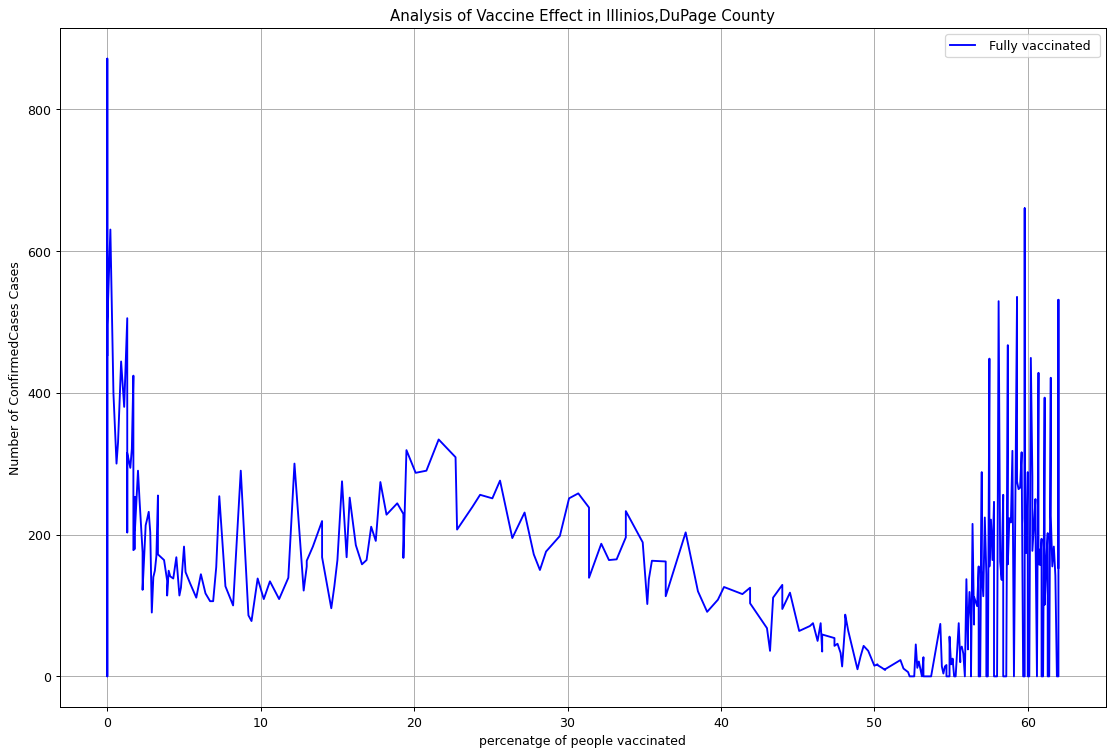

In [9]:
# Columns to check from the data source :
fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)
#plt.plot(df_Vaccines_Dupage_merged_data['Administered_Dose1_Pop_Pct'],df_Vaccines_Dupage_merged_data['DailyCases'], color ='sienna', label =' Took one dose')
plt.plot(df_Vaccines_Dupage_merged_data['Series_Complete_Pop_Pct'],df_Vaccines_Dupage_merged_data['DailyCases'],color ='blue', label=' Fully vaccinated ')


plt.ylabel('Number of ConfirmedCases Cases')
plt.xlabel('percenatge of people vaccinated')
plt.title("Analysis of Vaccine Effect in Illinios,DuPage County")
plt.legend(loc=1)



# save to png
plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends.png")



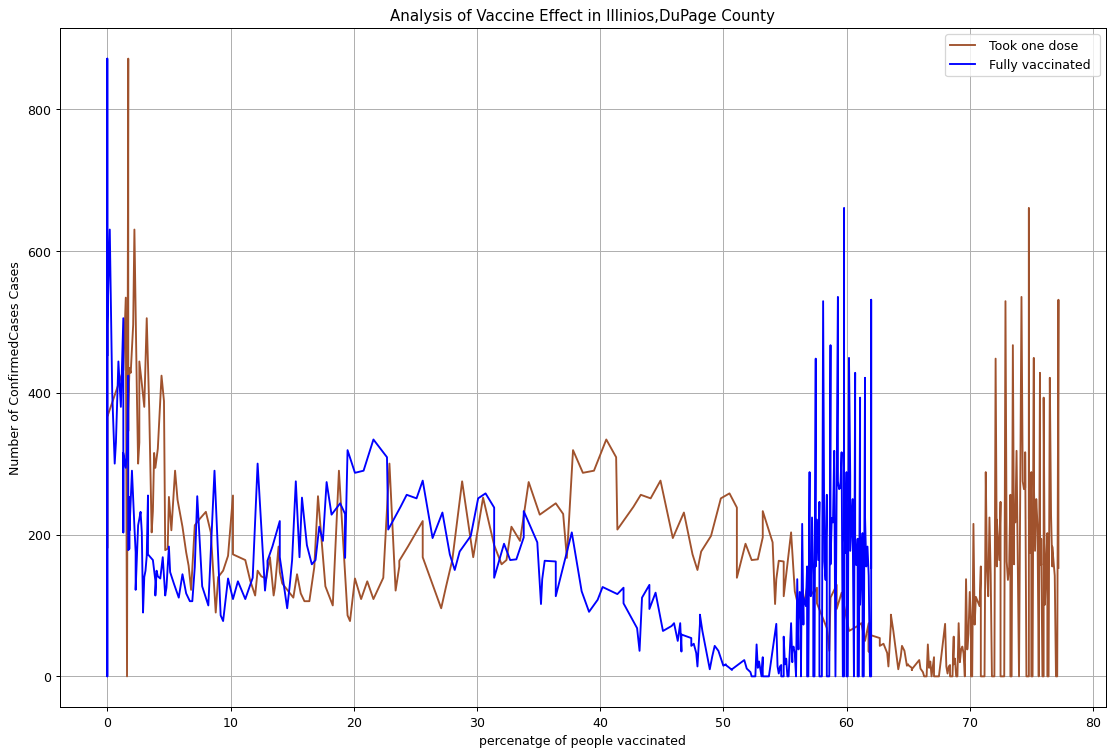

In [10]:
# Columns to check from the data source :
fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)
plt.plot(df_Vaccines_Dupage_merged_data['Administered_Dose1_Pop_Pct'],df_Vaccines_Dupage_merged_data['DailyCases'], color ='sienna', label =' Took one dose')
plt.plot(df_Vaccines_Dupage_merged_data['Series_Complete_Pop_Pct'],df_Vaccines_Dupage_merged_data['DailyCases'],color ='blue', label=' Fully vaccinated ')


plt.ylabel('Number of ConfirmedCases Cases')
plt.xlabel('percenatge of people vaccinated')
plt.title("Analysis of Vaccine Effect in Illinios,DuPage County")
plt.legend(loc=1)



# save to png
plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends_1.png")


### For the population of age grp above 12:


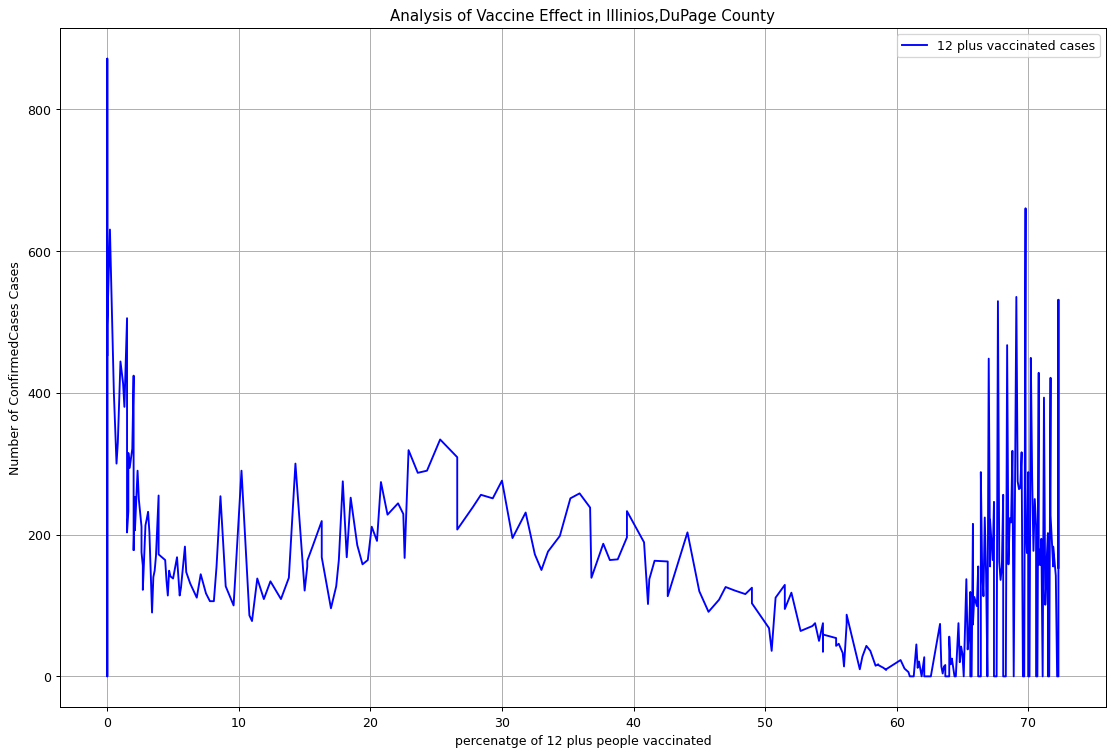

In [11]:
# Columns to check from the data source :
fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)

plt.plot(df_Vaccines_Dupage_merged_data['Series_Complete_12PlusPop_Pct'],df_Vaccines_Dupage_merged_data['DailyCases'],color='blue', label='12 plus vaccinated cases')


plt.ylabel('Number of ConfirmedCases Cases')
plt.xlabel('percenatge of 12 plus people vaccinated')
plt.title("Analysis of Vaccine Effect in Illinios,DuPage County")
plt.legend(loc=1)


# save to png
plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends_12Plus.png")


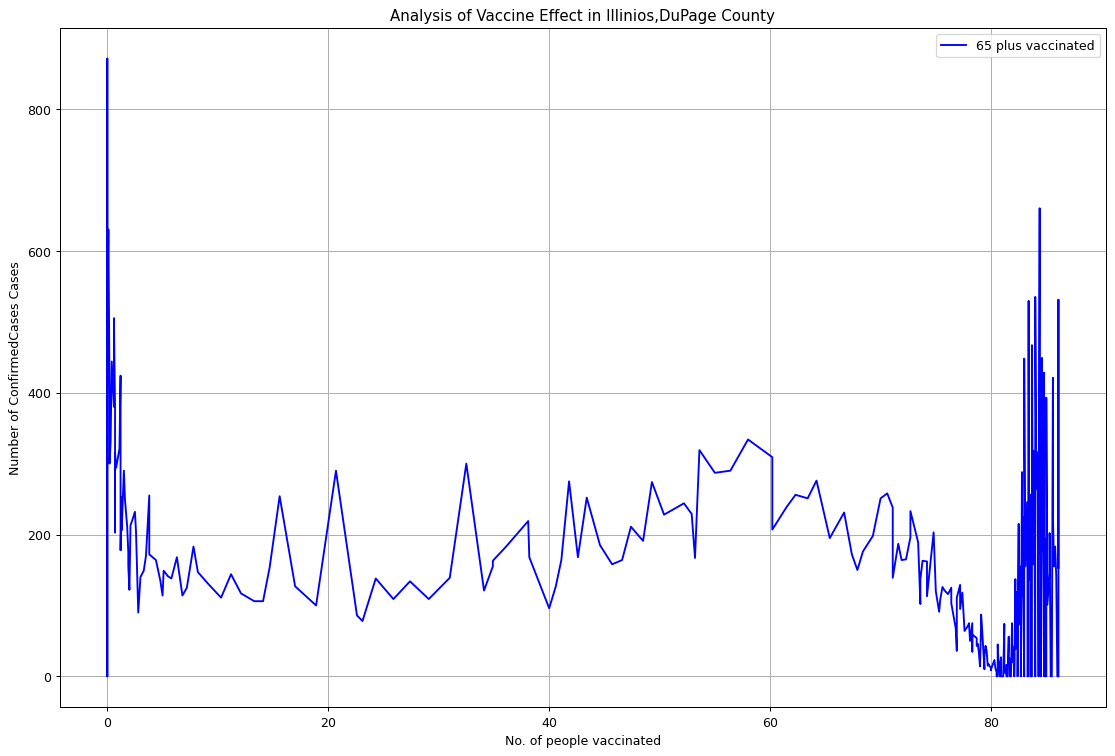

In [12]:
# Columns to check from the data source :
fig = plt.figure(figsize = (15,10),dpi=90)

plt.grid(True)

plt.plot(df_Vaccines_Dupage_merged_data['Series_Complete_65PlusPop_Pct'],df_Vaccines_Dupage_merged_data['DailyCases'],color='blue', label='65 plus vaccinated')


plt.ylabel('Number of ConfirmedCases Cases')
plt.xlabel('No. of people vaccinated')
plt.title("Analysis of Vaccine Effect in Illinios,DuPage County")
plt.legend(loc=1)


# save to png
plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends_65Plus.png")

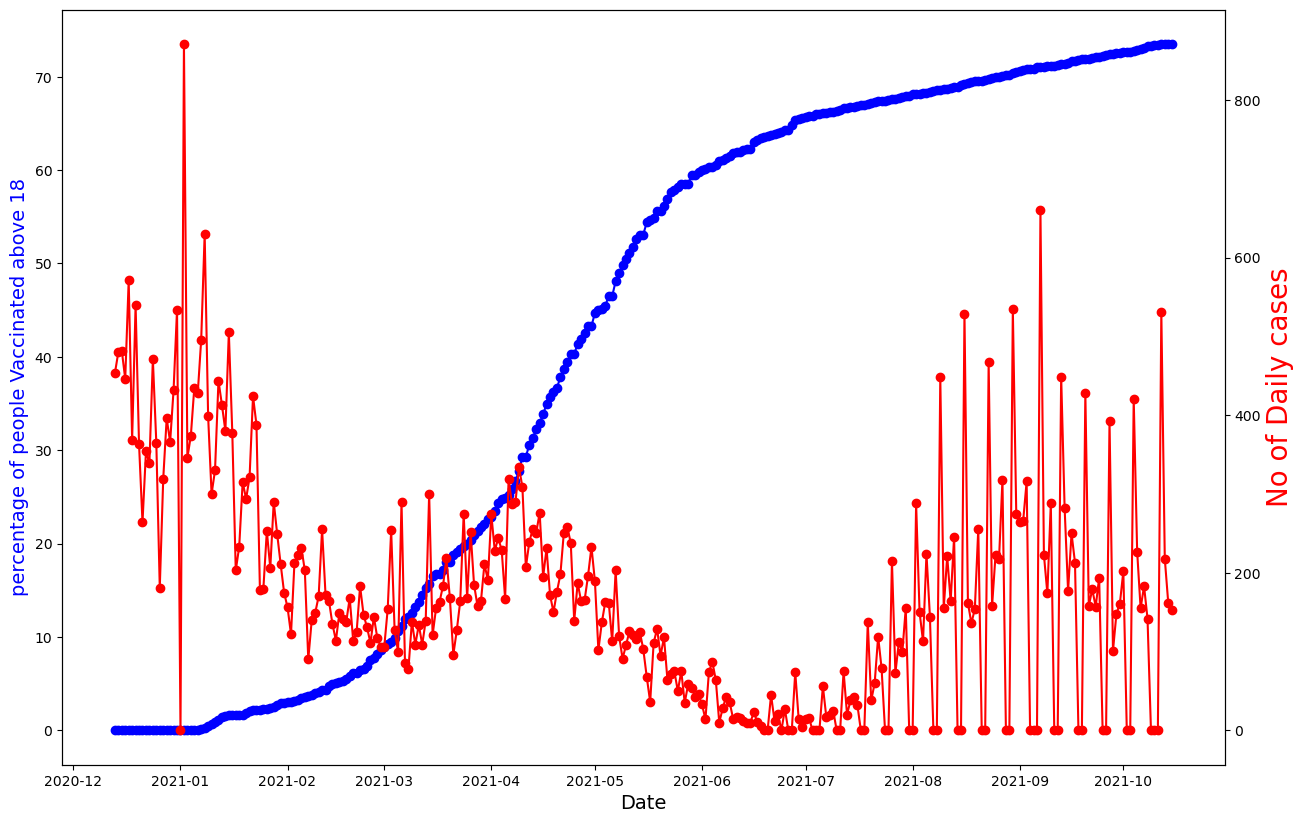

In [13]:

fig,ax = plt.subplots(figsize = (15,10),dpi=100)
ax.plot(df_Vaccines_Dupage_merged_data['Date'],df_Vaccines_Dupage_merged_data['Series_Complete_18PlusPop_Pct'],color ='blue',marker="o")
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("percentage of people Vaccinated above 18",color="blue",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_Vaccines_Dupage_merged_data['Date'],df_Vaccines_Dupage_merged_data['DailyCases'],color="red", marker="o")
# set x-axis label, color="red", marker="o")
# set x-axis label,color="blue",marker="o")
ax2.set_ylabel("No of Daily cases",color="red",fontsize=20)

# save the plot as a file

plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends_18Plus.png")


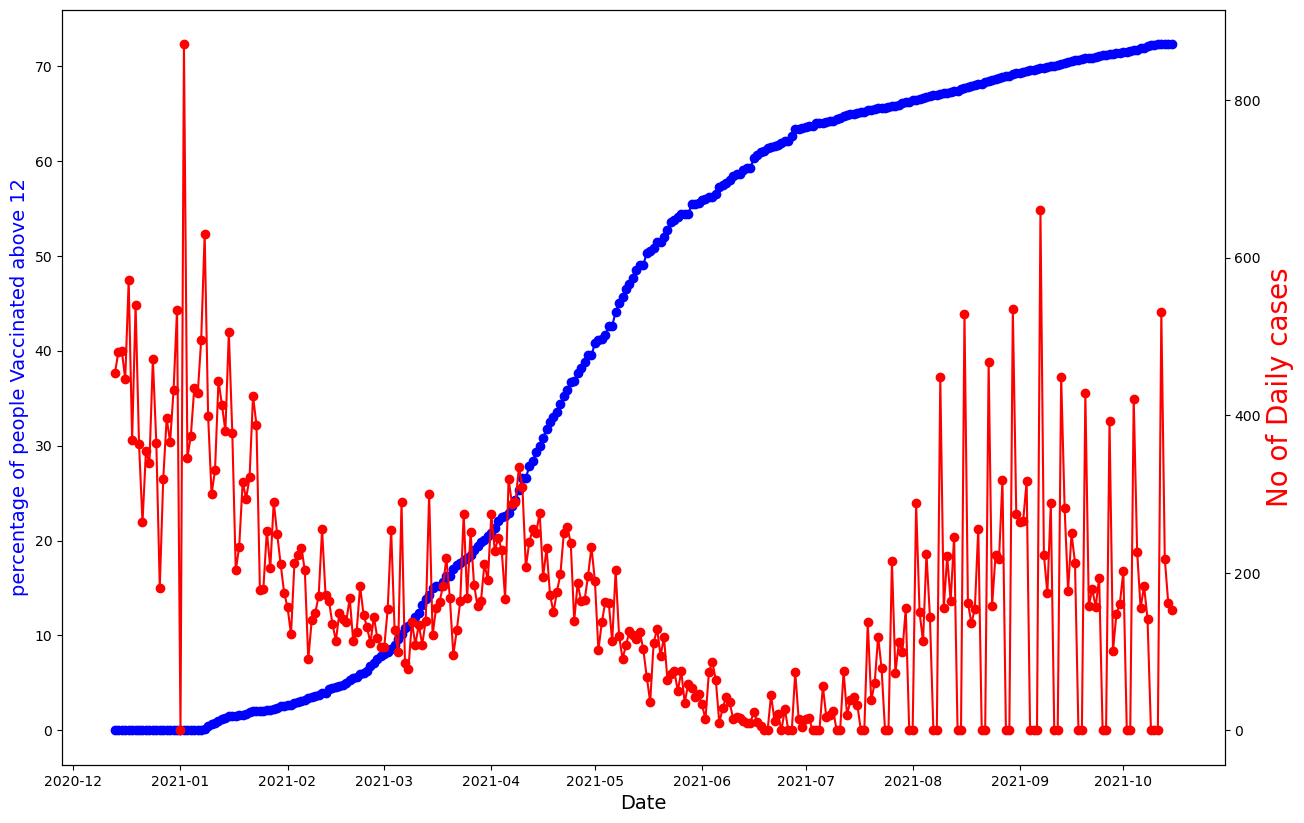

In [14]:

fig,ax = plt.subplots(figsize = (15,10),dpi=100)
ax.plot(df_Vaccines_Dupage_merged_data['Date'],df_Vaccines_Dupage_merged_data['Series_Complete_12PlusPop_Pct'],color ='blue',marker="o")
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("percentage of people Vaccinated above 12",color="blue",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_Vaccines_Dupage_merged_data['Date'],df_Vaccines_Dupage_merged_data['DailyCases'],color="red", marker="o")
# set x-axis label, color="red", marker="o")
# set x-axis label,color="blue",marker="o")
ax2.set_ylabel("No of Daily cases",color="red",fontsize=20)

# save the plot as a file

plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends_12Plus_1.png")

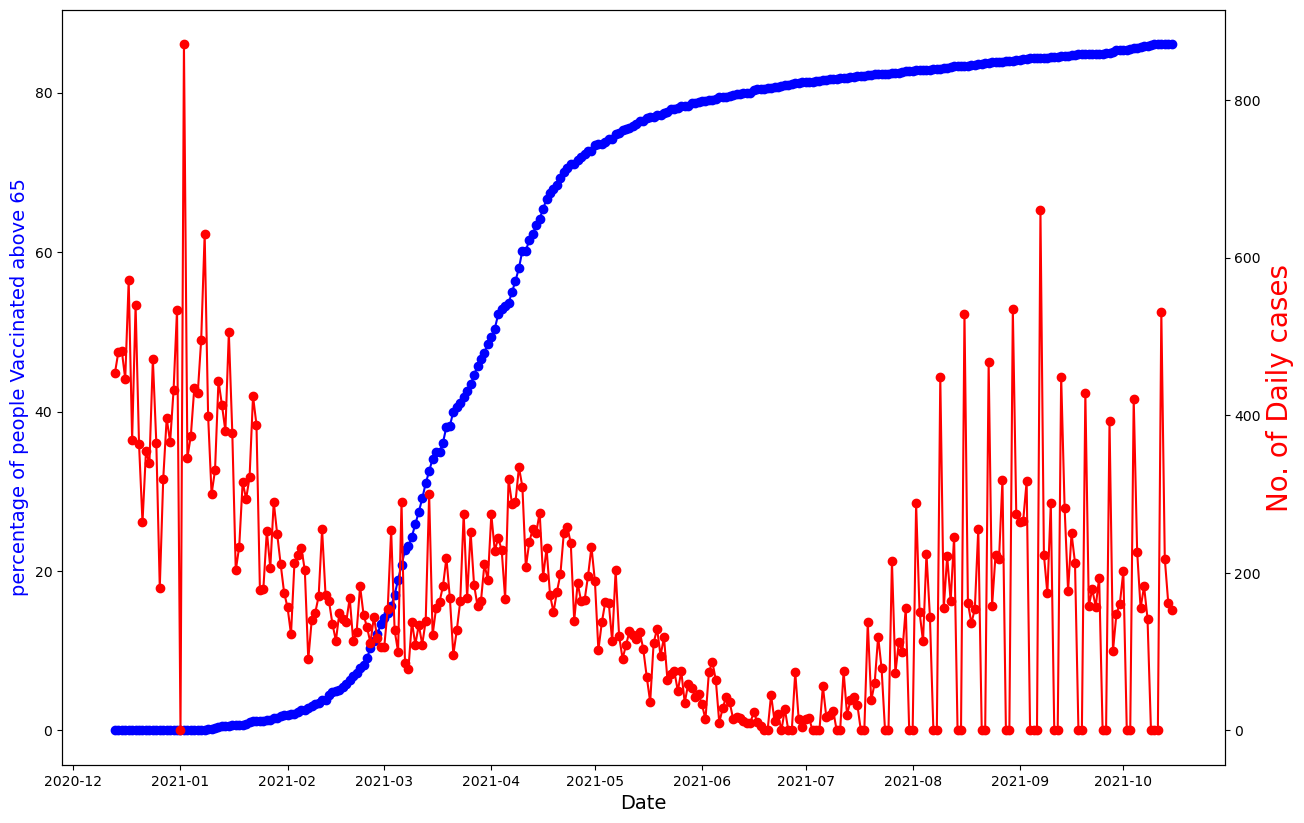

In [15]:

fig,ax = plt.subplots(figsize = (15,10),dpi=100)
ax.plot(df_Vaccines_Dupage_merged_data['Date'],df_Vaccines_Dupage_merged_data['Series_Complete_65PlusPop_Pct'],color ='blue',marker="o")
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("percentage of people Vaccinated above 65",color="blue",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_Vaccines_Dupage_merged_data['Date'],df_Vaccines_Dupage_merged_data['DailyCases'],color="red", marker="o")
# set x-axis label, color="red", marker="o")
# set x-axis label,color="blue",marker="o")
ax2.set_ylabel("No. of Daily cases",color="red",fontsize=20)

# save the plot as a file

plt.savefig("/Users/dinsind/Documents/SindhuWork/Data_512/A6_project_presentation/vaccine_trends_65Plus.png")